In [131]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas.io.data import DataReader
from datetime import datetime
from __future__ import division

In [132]:
tech_list = ['AAPL', 'GOOG', 'MFST', 'AMZN']

In [133]:
end=datetime.now()
start=datetime(end.year-1, end.month, end.day)

In [134]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [135]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,120.278095,121.352460,118.970437,120.145714,5.183474e+07,119.129852
std,7.555267,7.315764,7.785590,7.541925,2.113212e+07,7.292848
min,94.870003,107.370003,92.000000,103.120003,1.302370e+07,102.680478
25%,113.567497,114.527499,112.107500,113.479998,3.735410e+07,112.953997
50%,120.795002,121.584999,119.349998,120.299999,4.707700e+07,119.658136
75%,127.142502,127.907497,125.982502,126.912502,5.952868e+07,125.492359
max,134.460007,134.539993,131.399994,133.000000,1.622063e+08,131.380384


In [136]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2014-12-24 to 2015-12-23
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [137]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-12-24,112.580002,112.709999,112.010002,112.010002,14479600,110.133510
2014-12-26,112.099998,114.519997,112.010002,113.989998,33721000,112.080335
2014-12-29,113.790001,114.769997,113.699997,113.910004,27598900,112.001681
2014-12-30,113.639999,113.919998,112.110001,112.519997,29881500,110.634961
2014-12-31,112.820000,113.129997,110.209999,110.379997,41403400,108.530812


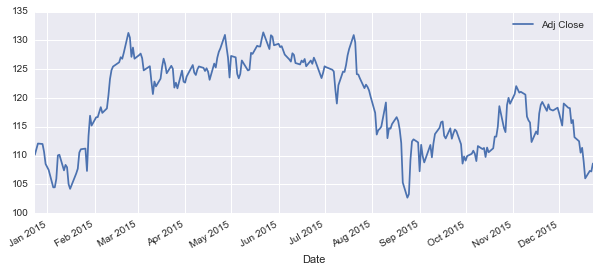

In [138]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

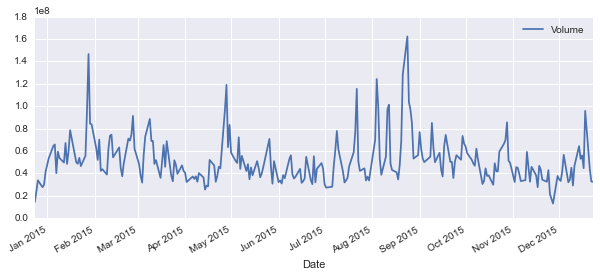

In [139]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [141]:
ma_day=[20, 40, 50]

In [142]:
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'], ma)

In [143]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close,MA for 20 days,MA for 40 days,MA for 50 days
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000,233.000000,213.000000,203.000000
mean,120.278095,121.352460,118.970437,120.145714,5.183474e+07,119.129852,119.870631,120.389742,120.486356
std,7.555267,7.315764,7.785590,7.541925,2.113212e+07,7.292848,6.280509,5.554308,5.404439
min,94.870003,107.370003,92.000000,103.120003,1.302370e+07,102.680478,108.072131,111.049153,111.674775
25%,113.567497,114.527499,112.107500,113.479998,3.735410e+07,112.953997,113.236447,115.063152,115.336661
50%,120.795002,121.584999,119.349998,120.299999,4.707700e+07,119.658136,121.423258,121.642881,121.368747
75%,127.142502,127.907497,125.982502,126.912502,5.952868e+07,125.492359,125.682559,125.237364,125.531726
max,134.460007,134.539993,131.399994,133.000000,1.622063e+08,131.380384,128.714420,127.505294,127.171327


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000002F0C2160>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000002FB5A9E8>], dtype=object)

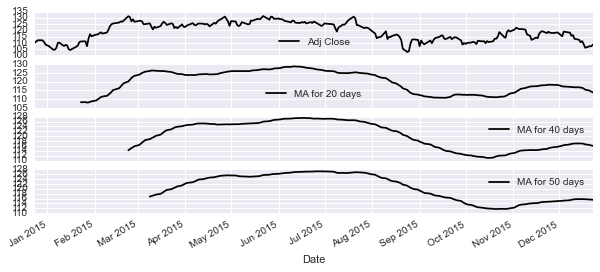

In [144]:
AAPL[['Adj Close', 'MA for 20 days', 'MA for 40 days', 'MA for 50 days']].plot(subplots=True, legend=True, figsize=(10,4))

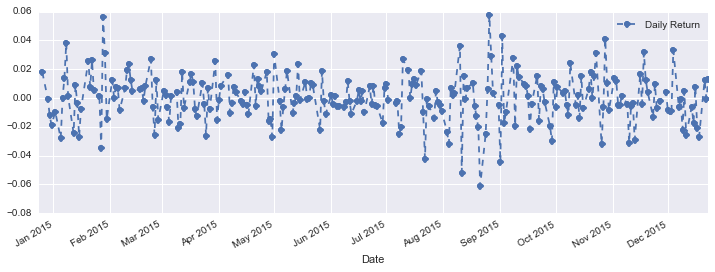

In [145]:
AAPL['Daily Return'] =AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

In [146]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 20 days,MA for 40 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2014-12-24,112.580002,112.709999,112.010002,112.010002,14479600,110.133510,NaN,NaN,NaN,NaN
2014-12-26,112.099998,114.519997,112.010002,113.989998,33721000,112.080335,NaN,NaN,NaN,0.017677
2014-12-29,113.790001,114.769997,113.699997,113.910004,27598900,112.001681,NaN,NaN,NaN,-0.000702
2014-12-30,113.639999,113.919998,112.110001,112.519997,29881500,110.634961,NaN,NaN,NaN,-0.012203
2014-12-31,112.820000,113.129997,110.209999,110.379997,41403400,108.530812,NaN,NaN,NaN,-0.019019


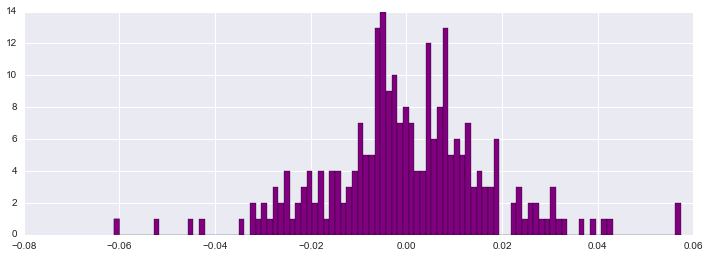

In [147]:
AAPL['Daily Return'].hist(bins=100, color='purple', figsize=(12,4))

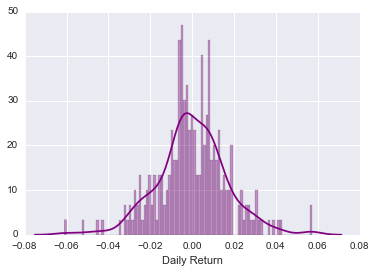

In [148]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [149]:
closing_df=DataReader(['AAPL', 'GOOG', 'MSFT', 'AMZN'], 'yahoo', start, end)['Adj Close']

In [150]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-12-24,110.133510,303.029999,528.772422,46.864184
2014-12-26,112.080335,309.089996,534.032454,46.611076
2014-12-29,112.001681,312.040009,530.332426,46.192472
2014-12-30,110.634961,310.299988,530.422394,45.773867
2014-12-31,108.530812,310.350006,526.402397,45.218974


In [151]:
tech_rets=closing_df.pct_change()

In [152]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-12-24,NaN,NaN,NaN,NaN
2014-12-26,0.017677,0.019998,0.009948,-0.005401
2014-12-29,-0.000702,0.009544,-0.006928,-0.008981
2014-12-30,-0.012203,-0.005576,0.000170,-0.009062
2014-12-31,-0.019019,0.000161,-0.007579,-0.012122


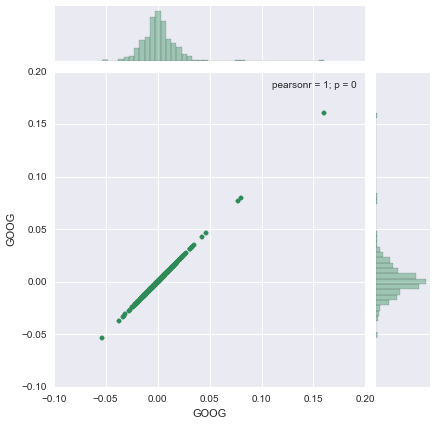

In [153]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

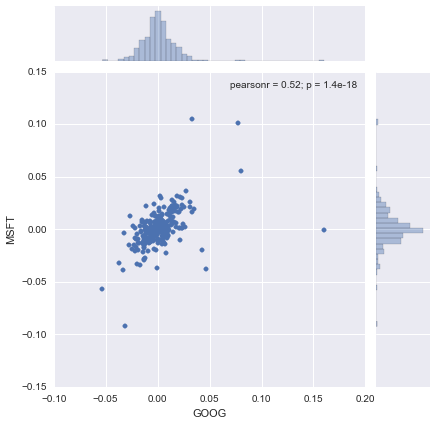

In [154]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

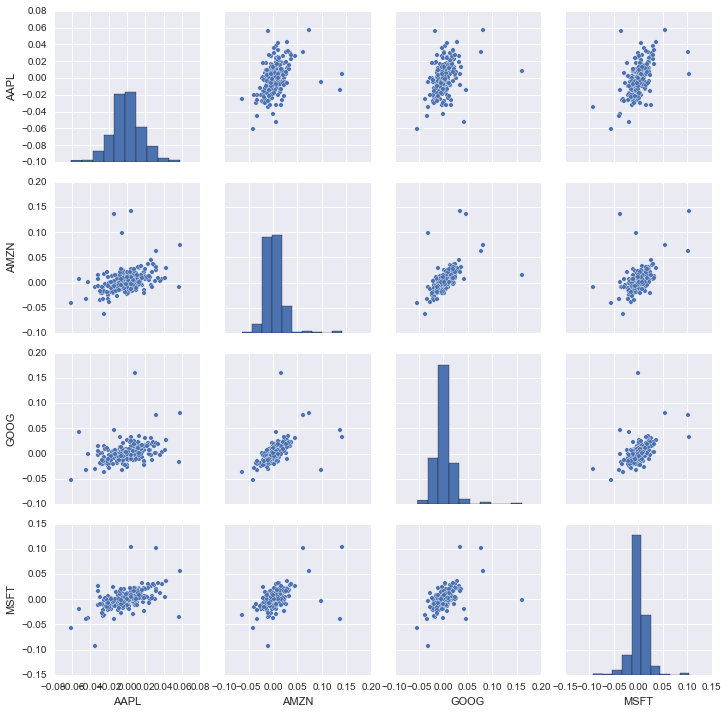

In [155]:
sns.pairplot(tech_rets.dropna())

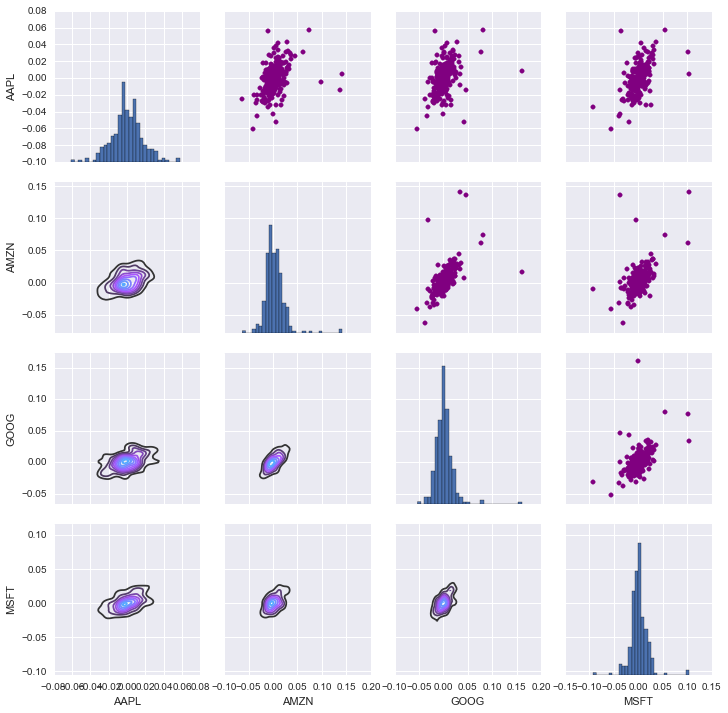

In [156]:
returns_fig=sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

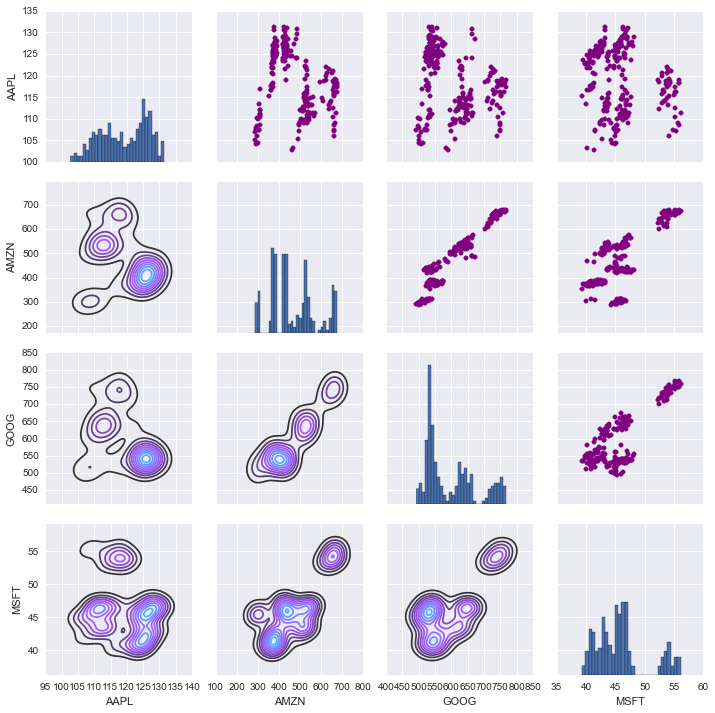

In [157]:
returns_fig2 = sns.PairGrid(closing_df)
returns_fig2.map_upper(plt.scatter, color='purple')
returns_fig2.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig2.map_diag(plt.hist, bins=30)

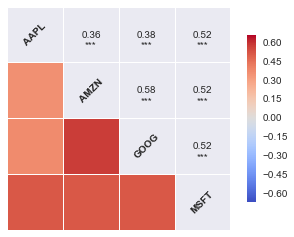

In [158]:
sns.corrplot(tech_rets.dropna(), annot=True)

In [159]:
#RISK ANALYSIS

In [160]:
rets = tech_rets.dropna()

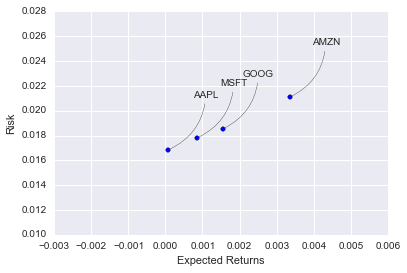

In [161]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected Returns')
plt.ylabel('Risk')
plt.ylim([0.01, 0.028])
plt.xlim([-0.003, 0.006])
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(50,50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', connectionstyle='arc3, rad=-0.3'))

In [162]:
##value at risk using "bootstrap" method

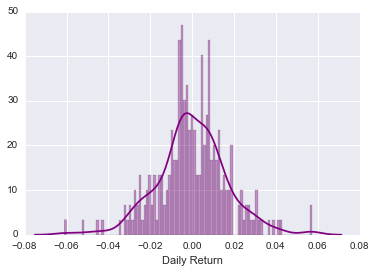

In [163]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [164]:
rets['AAPL'].quantile(0.05)

-0.027099590798402795

In [165]:
rets['GOOG'].quantile(0.05)

-0.021260557693206339

In [166]:
rets['AMZN'].quantile(0.05)

-0.020804510982678159

In [167]:
rets['MSFT'].quantile(0.05)

-0.021176125277049096

In [168]:
#Value at Risk using the Monte Carlo method

In [169]:
days=365
dt=1/days
mu=rets.mean()['GOOG']
sigma=rets.std()['GOOG']

In [170]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price=np.zeros(days)
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in xrange(1,days):
        shock[x]=np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1] + (price[x-1] * (drift[x] +shock[x]))
        
    return price    

In [171]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-12-24,530.512424,531.761394,527.022384,528.772422,705900,528.772422
2014-12-26,528.772422,534.252417,527.312364,534.032454,1036000,534.032454
2014-12-29,532.192446,535.482414,530.013375,530.332426,2278500,530.332426
2014-12-30,528.092396,531.152424,527.132366,530.422394,876300,530.422394
2014-12-31,531.252429,532.602384,525.802363,526.402397,1368200,526.402397


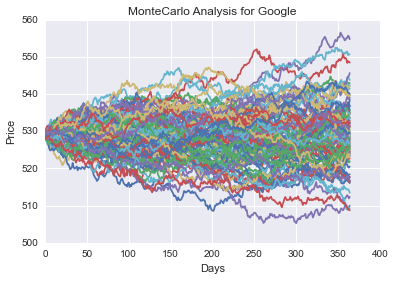

In [172]:
start_price=528.77

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title('MonteCarlo Analysis for Google')

In [173]:
runs=10000
simulations=np.zeros(runs)
np.set_printoptions(threshold=5)
for run in xrange(runs):
    simulations[run]=stock_monte_carlo(start_price, days, mu, sigma)[days-1];

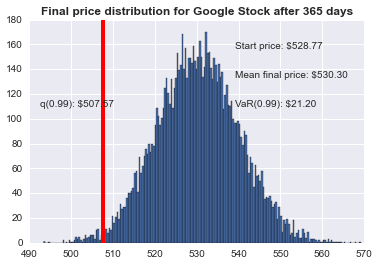

In [174]:
q=np.percentile(simulations, 1)
plt.hist(simulations, bins=200)
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" %q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')